<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/Feature_selection_using_MI_on_loan_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
# Assuming df is your DataFrame
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    print(f"Unique values for column '{col}':")
    print(df[col].value_counts())
    print()


Unique values for column 'Loan_ID':
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Unique values for column 'Gender':
Male      489
Female    112
Name: Gender, dtype: int64

Unique values for column 'Married':
Yes    398
No     213
Name: Married, dtype: int64

Unique values for column 'Dependents':
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Unique values for column 'Education':
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Unique values for column 'Self_Employed':
No     500
Yes     82
Name: Self_Employed, dtype: int64

Unique values for column 'Property_Area':
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Unique values for column 'Loan_Status':
Y    422
N    192
Name: Loan_Status, dtype: int64



In [ ]:
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 62.5+ KB


In [ ]:
# Remove all null value
df.dropna(inplace=True)
# drop the unimportant column("Loan_ID")
df.drop(labels=["Loan_ID"],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    float64
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    float64
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 45.1+ KB


In [ ]:
# encode the Categorical Variable
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns
encoded_df = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df)

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    float64
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    float64
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 45.1 KB


In [ ]:
X = encoded_df.copy()
y = X.pop("Loan_Status")

In [ ]:
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores # show a few features with their MI scores

ApplicantIncome      0.516271
Credit_History       0.143139
Loan_Amount_Term     0.040355
Self_Employed        0.022846
Married              0.019579
Property_Area        0.013012
Dependents           0.003120
Education            0.002285
Gender               0.002027
CoapplicantIncome    0.000000
LoanAmount           0.000000
Name: MI Scores, dtype: float64

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

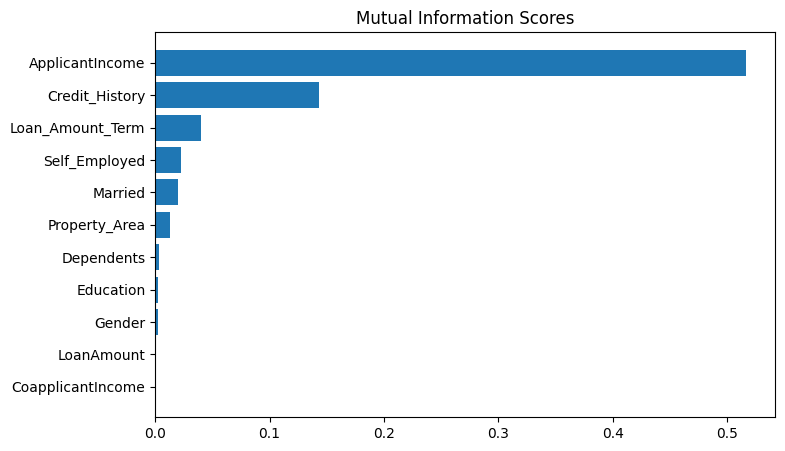

In [ ]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)